In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
#Part 1: Understanding Product Categories
df = pd. read_csv('amz_uk_price_prediction_dataset.csv')

In [73]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [74]:
df.shape

(2443651, 9)

In [75]:
freq_table = df['category'].value_counts()
freq_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [76]:
proportion_table =df['category'].value_counts(normalize=True).head(10)
proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Manicure & Pedicure Products              0.007751
Skin Care                                 0.007681
Make-up                                   0.007675
Hair Care                                 0.007667
Fragrances                                0.007597
Name: proportion, dtype: float64

/var/folders/tj/ks1sq5t50v5465wqpwwb64b00000gn/T/ipykernel_14747/421554702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


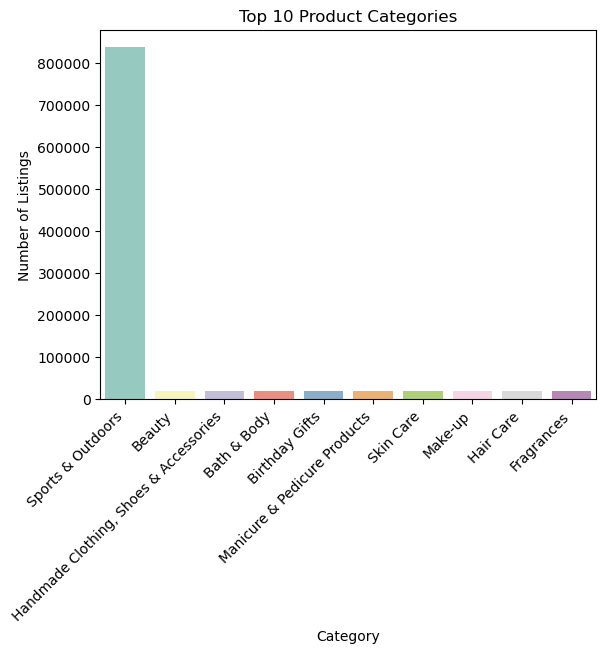

In [77]:
top10 = freq_table.head(10)

sns.barplot(
    x=top10.index,
    y=top10.values,
    palette="Set3"
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.show()

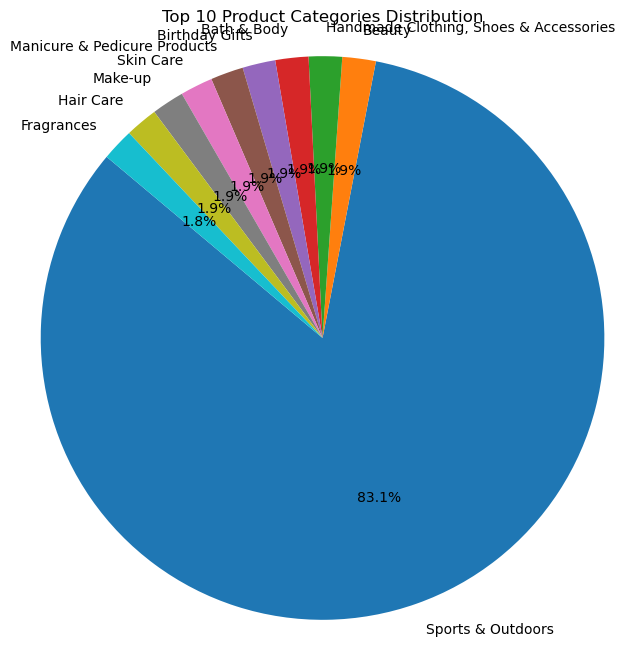

In [78]:
plt.figure(figsize=(8, 8))

plt.pie(
    proportion_table.values,
    labels=proportion_table.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 10 Product Categories Distribution")
plt.axis('equal')  
plt.show()

In [79]:
#“Sports & Outdoors”dominate the listings

In [80]:
# Part 2: Delving into Product Pricing

In [81]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

In [82]:
mean_price 

np.float64(89.24380943923663)

In [83]:
mode_price 

np.float64(9.99)

The average price of products is approximately €89.24, while the most common price (mode) is €9.99.
This large difference indicates that although most products are low-priced, a small number of very expensive products significantly increase the mean price, suggesting a right-skewed price distribution.

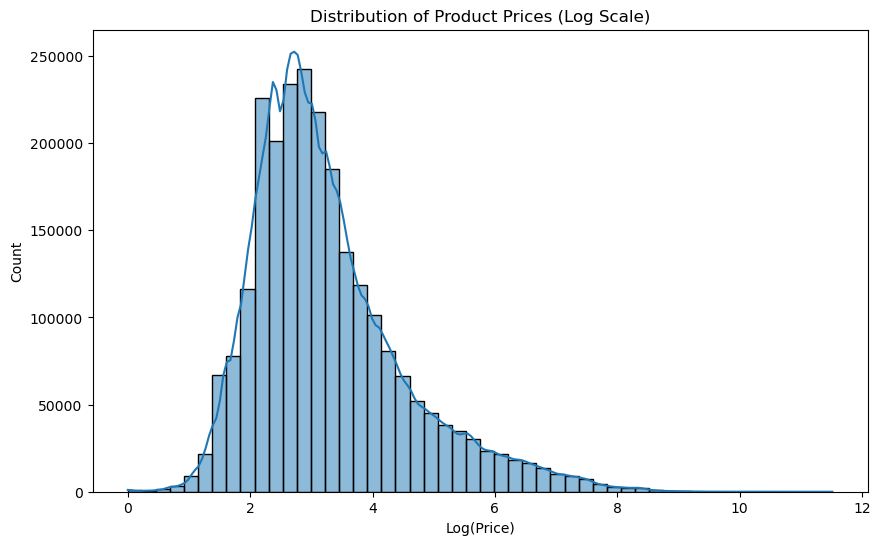

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.xlabel('Log(Price)')
plt.title('Distribution of Product Prices (Log Scale)')
plt.show()

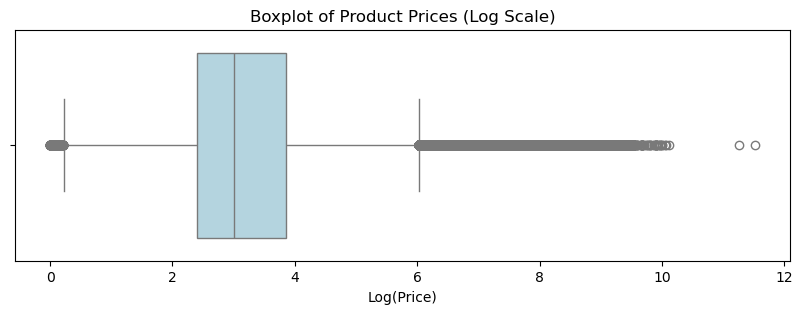

In [85]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=np.log1p(df['price']), color="lightblue")
plt.xlabel("Log(Price)")
plt.title("Boxplot of Product Prices (Log Scale)")
plt.show()

Due to the highly right-skewed distribution of product prices, a log transformation was applied to improve visualization.
The transformed box plot clearly shows the central tendency and spread of prices while reducing the influence of extreme outliers.

In [86]:
df['price_quantile'] = pd.qcut(
    df['price'],
    q=4,
    labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']
)

df['price_quantile'].value_counts()

price_quantile
Q1 (Lowest)     629239
Q3              612341
Q4 (Highest)    609043
Q2              593028
Name: count, dtype: int64

In [87]:
#Part 3: Unpacking Product Ratings

In [88]:
r= df[df['stars'] > 0]['stars']

In [89]:
mean_stars = r.mean()
mean_stars


np.float64(4.31916076222691)

In [90]:
median_stars = r.median()
median_stars

4.4

In [91]:
mode_stars = r.mode()[0]
mode_stars

np.float64(4.5)

Products with a rating value of 0 were treated as unrated items and excluded from the analysis to avoid distorting the true distribution of customer ratings.
After excluding unrated products (stars = 0), the average product rating on Amazon UK is approximately 4.32, with a median of 4.4 and a mode of 4.5.

This indicates that consumers generally rate products very positively.

The distribution of ratings is slightly left-skewed, suggesting that most products receive high ratings, while a smaller number of lower-rated products pull the mean slightly below the median.

In [92]:
var_stars = r.var()  
var_stars  

0.30834337523805183

In [93]:
std_stars = r.std()  
std_stars

0.5552867504614637

In [94]:
Q1 = r.quantile(0.25)
Q3 = r.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(np.float64(4.1), np.float64(4.6), np.float64(0.5))

In [95]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(3.3499999999999996), np.float64(5.35))

In [96]:
outliers = r[(r < lower_bound) | (r > upper_bound)]
outliers.head()

98     3.0
242    2.5
406    3.2
420    3.3
603    3.0
Name: stars, dtype: float64

The product ratings on Amazon UK are generally very consistent.
The mean rating is approximately 4.32, with a median of 4.4 and a mode of 4.5, indicating that most products receive high ratings.
The interquartile range is only 0.5, showing that the middle 50% of ratings are tightly clustered.
Although there are some lower-rated outliers, they are relatively few and do not significantly affect the overall distribution.

In [97]:
skew_stars = r.skew()
skew_stars

np.float64(-2.3795681122127945)

In [98]:
kurt_stars = r.kurt()
kurt_stars

np.float64(9.78193769066435)

The distribution of product ratings does not follow a normal distribution.
It is strongly left-skewed (skewness = -2.38), indicating that most products receive high ratings, while a small number of low ratings form a long left tail.
The high kurtosis value (9.78) suggests a highly peaked distribution with heavy tails, reflecting strong concentration around high ratings and the presence of outliers.


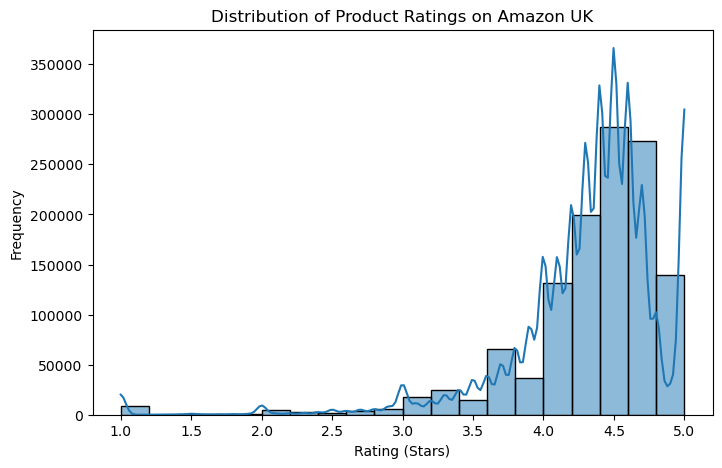

In [99]:
plt.figure(figsize=(8, 5))
sns.histplot(r, bins=20, kde=True)
plt.xlabel('Rating (Stars)')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings on Amazon UK')
plt.show()

The histogram shows that product ratings are highly concentrated at the upper end of the scale.
Ratings around 4.5 stars occur most frequently, indicating that the majority of products receive very positive evaluations.
This suggests a strong tendency toward high ratings, with relatively few low-rated products.

Business-Centric Summary of Key Findings

1. Product Category Distribution

The analysis of product categories reveals a highly imbalanced distribution of listings on Amazon UK.
	•	The category “Sports & Outdoors” overwhelmingly dominates the platform, accounting for over 80% of all product listings.
	•	All other categories individually represent only a very small fraction of the total catalog, each contributing roughly 1–2% of listings.

Business Insight:
This strong dominance suggests that Amazon UK’s marketplace is heavily skewed toward the Sports & Outdoors segment. For sellers, this indicates:
	•	High competition within the dominant category
	•	Potential opportunities for differentiation or niche positioning in underrepresented categories

⸻

2. Product Pricing Analysis

Central Tendency
	•	Average price (mean): ~£89
	•	Most common price (mode): £9.99

The large gap between the mean and the mode indicates a right-skewed price distribution.

Business Insight:
Most products are priced at the low end, while a smaller number of high-priced items significantly increase the average price. This suggests that:
	•	Low-priced products dominate in volume
	•	Premium-priced products exist but are relatively rare

Price Distribution
	•	The histogram and box plot show a long right tail with numerous high-price outliers.
	•	These outliers compress the visual scale, making the majority of prices appear concentrated near the lower end.

Business Implication:
Pricing strategies should focus on:
	•	Competitive low-price positioning for mass-market products
	•	Clear value differentiation for premium-priced items to justify higher prices

⸻

3. Product Rating (Stars) Analysis

Central Tendency

After excluding unrated products (stars = 0):
	•	Mean rating: ~4.32
	•	Median rating: ~4.4
	•	Mode rating: 4.5

This indicates that most products receive high customer ratings.

Business Insight:
Overall customer satisfaction on Amazon UK is strong, suggesting:
	•	Effective quality control
	•	Strong alignment between customer expectations and product performance

⸻

4. Rating Variability and Consistency
	•	Standard deviation: ~0.56
	•	Interquartile Range (IQR): 0.5 (Q1 = 4.1, Q3 = 4.6)

The narrow IQR indicates that the middle 50% of ratings are tightly clustered.

Business Insight:
Customer feedback is highly consistent, with only a small number of low-rated products acting as outliers. These low ratings may point to:
	•	Quality issues
	•	Mismatched product descriptions
	•	Fulfillment or logistics problems

⸻

5. Distribution Shape: Skewness & Kurtosis
	•	Skewness: −2.38 (strong negative skew)
	•	Kurtosis: 9.78 (very high)

Interpretation:
	•	Ratings are heavily skewed toward high values
	•	The distribution is highly peaked, with most ratings concentrated near 4–5 stars

Business Implication:
High ratings are the norm rather than the exception. As a result:
	•	A rating below ~4.0 may significantly harm perceived product quality
	•	Small differences in ratings can strongly influence customer choice

⸻

6. Overall Business Takeaways
	1.	Category concentration is extreme, with Sports & Outdoors dominating listings.
	2.	Pricing is heavily skewed toward low-price products, despite a high average influenced by premium outliers.
	3.	Customer satisfaction is generally very high, with ratings clustered tightly around 4–5 stars.
	4.	Low-rated products are rare but critical, as they stand out strongly against an otherwise positive baseline.

⸻

Strategic Recommendations
	•	Sellers should carefully assess category competition before entering dominant segments.
	•	Pricing strategies should reflect the highly price-sensitive nature of the marketplace.
	•	Maintaining ratings above 4.0 is crucial, as deviations are highly visible to consumers.